<a href="https://colab.research.google.com/github/Tejas-0001/ML/blob/main/Basics_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
x = torch.rand(2,2).to(device) # This first create in cpu ram then move to gpu
x = torch.rand(2,2 , device=device) # This directly creates tensor in gpu memory

# Autograd

In [ ]:
import torch
# requires_grad = True -> automatic differentiation from vector jacobian product using chain rule by tracking the tensor
x = torch.randn(3,requires_grad=True)
y = x+2

# y was created as a result of operation on x so it too has grad_fn attribute now
# grad_fn: references the function that created the tensor
print(x)
print(y)
print(x.grad_fn)
print(y.grad_fn)

tensor([ 0.8977, -1.1301, -0.4192], requires_grad=True)
tensor([2.8977, 0.8699, 1.5808], grad_fn=<AddBackward0>)
None


In [ ]:
z = y*y*3
print(z)
z = z.mean()
print(z)

tensor([25.1898,  2.2703,  7.4968], grad_fn=<MulBackward0>)
tensor(11.6523, grad_fn=<MeanBackward0>)


In [ ]:
z.backward() # will do backpropogation and compute all the gradient automatically
print(x.grad) #dz/dx

tensor([11.5908,  3.4797,  6.3232])


In [ ]:
# When we don't want to track the tensor we can do following
# x.requires_grad_(False)
# x.detach()
#wrap it in with torch.no_grad():

In [ ]:
a=torch.randn(2,2)
b=(a*a).sum()
print(a.requires_grad)
print(b.grad_fn)
#.requires_grad_(...)change flag in place
a.requires_grad_(True)
b=(a*a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [ ]:
a=torch.randn(2,2,requires_grad=True)
b=a.detach()
#.detach(): same tensor but with no gradient
print(a.requires_grad)
print(b.requires_grad)

True
False


In [ ]:
# Wrapping with torch.no_grad():
a= torch.randn(2,2,requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
  b = a**2
  print(b.requires_grad)

True
False


# Gradient Descent Autograd

f(x) = w * x + b # Linear Regression example

In [ ]:
import torch

x=torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
#f(x) = 2*x
y=torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)
w= torch.tensor(0.0, dtype=torch.float32,requires_grad=True)

# Model output
def forward(x):
  return w*x

#loss = MSE
def loss(y,y_pred):
  return(((y-y_pred)**2).mean())

X_test = 5.0

print(f"Prediction Before training: f({X_test}) = {forward(X_test).item():.3f}")

Prediction Before training: f(5.0) = 0.000


In [ ]:
# Training
learning_rate=0.01
n_epochs=100

for epoch in range(n_epochs):
  # Predict = Forward Pass
  y_pred = forward(x)

  # loss
  l = loss(y,y_pred)

  # Calculate Gradient = Backward Pass
  l.backward()

  # Update weights
  # w.data = w.data - learning_rate * w.grad
  with torch.no_grad():
    w -= learning_rate * w.grad

  # Zero the gradients after updating
  w.grad.zero_()

  if (epoch+1) % 10 == 0:
    print(f"Epoch : {epoch + 1} : W = {w.item():.3f}, loss = {l.item():.3f}")



Epoch : 10 : W = 1.998, loss = 0.000
Epoch : 20 : W = 2.000, loss = 0.000
Epoch : 30 : W = 2.000, loss = 0.000
Epoch : 40 : W = 2.000, loss = 0.000
Epoch : 50 : W = 2.000, loss = 0.000
Epoch : 60 : W = 2.000, loss = 0.000
Epoch : 70 : W = 2.000, loss = 0.000
Epoch : 80 : W = 2.000, loss = 0.000
Epoch : 90 : W = 2.000, loss = 0.000
Epoch : 100 : W = 2.000, loss = 0.000


In [ ]:
print(f"Prediction After training : f({X_test}) = {forward(X_test).item():.3f}")

Prediction After training : f(5.0) = 10.000


# Model, Loss and Optimizer
A typical Pytorch Pipeline looks like this:
- Design Model (Input, output, Forward pass with different layers)
- Construct loss and optimizers
- Training Loop (Forward: Compute Prediction and loss, Backward: Compute gradients and Update weights)

In [ ]:
import torch
import torch.nn as nn

# Linear Regression
# f(x)=w*x + b
# f(x)= 2*x

# Training Samples maintain the shape
X = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10],[12],[14],[16]], dtype=torch.float32)

n_samples,n_features = X.shape
print(f"n_samples : {n_samples} and n_features : {n_features}")

X_test = torch.tensor([5], dtype=torch.float32)


n_samples : 8 and n_features : 1


In [ ]:
# Designing Model, implementing forward pass
#model = nn.Linear(input_size,output_size) we can also use built in pytorch model


# Always Pytorch Model class inherits from nn.Module
class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()

    # Define Different Layers
    self.lin = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

input_size, output_size = n_features , n_features
model = LinearRegression(input_size,output_size)

print(f"Prediction Before Training: f({X_test.item():.3f}) = {model(X_test).item():.3f}")

learning_rate = 0.01
n_epochs = 100
loss=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# Training Loop
for epoch in range(n_epochs):
  #Predicted  = forward pass with our model
  y_predicted = model(X)

  # loss
  l = loss(Y,y_predicted)

  #Calculate gradient =  backward pass
  l.backward()

  #update weights
  optimizer.step()

  #Zero the gradients after updating
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    w,b = model.parameters() #unpack parameters
    print(f"Epoch : {epoch + 1} : W = {w[0][0].item():.3f}, loss = {l.item():.3f}")




Prediction Before Training: f(5.000) = 2.344
Epoch : 10 : W = 2.119, loss = 0.094
Epoch : 20 : W = 2.115, loss = 0.087
Epoch : 30 : W = 2.111, loss = 0.080
Epoch : 40 : W = 2.106, loss = 0.074
Epoch : 50 : W = 2.102, loss = 0.068
Epoch : 60 : W = 2.098, loss = 0.063
Epoch : 70 : W = 2.094, loss = 0.058
Epoch : 80 : W = 2.091, loss = 0.054
Epoch : 90 : W = 2.087, loss = 0.050
Epoch : 100 : W = 2.084, loss = 0.046


In [ ]:
print(f"Prediction After training : f({X_test.item()}) = {model(X_test).item():.3f}")

Prediction After training : f(5.0) = 9.948


# Neural Net
GPU,Datasets,DataLoader,Transforms,NeuralNet,Training and Evaluation


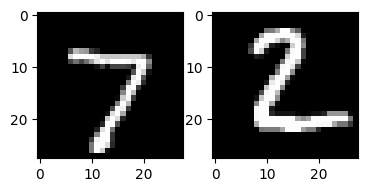

In [2]:
from random import shuffle
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyper Parameters
input_size = 784 #28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 2
learning_rate = 0.001

#MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

#Data Loader
train_loader= torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(test_loader)
example_data, example_targets=next(examples)

for i in range(batch_size):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [3]:
# Fully connected neural layer with one hiddden layer
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # No activation or softmax at the end
    return out

model = NeuralNet(input_size,hidden_size,num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

#Training the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    # Original shape = [100,1,28,28]
    # Resized shape = [100, 784]
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    # Forward Pass
    outputs = model(images)
    loss = criterion(outputs,labels)

    # Backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1) % 100 == 0:
      print(f"Epoch : {epoch+1}/{num_epochs}, Step : [{i+1}/{n_total_steps}], Loss : {loss.item():.4f}")

Epoch : 1/2, Step : [100/30000], Loss : 0.5352
Epoch : 1/2, Step : [200/30000], Loss : 0.1255
Epoch : 1/2, Step : [300/30000], Loss : 0.7908
Epoch : 1/2, Step : [400/30000], Loss : 0.3396
Epoch : 1/2, Step : [500/30000], Loss : 0.3592
Epoch : 1/2, Step : [600/30000], Loss : 0.0619
Epoch : 1/2, Step : [700/30000], Loss : 0.1074
Epoch : 1/2, Step : [800/30000], Loss : 0.0257
Epoch : 1/2, Step : [900/30000], Loss : 3.6118
Epoch : 1/2, Step : [1000/30000], Loss : 0.1592
Epoch : 1/2, Step : [1100/30000], Loss : 0.1468
Epoch : 1/2, Step : [1200/30000], Loss : 0.0824
Epoch : 1/2, Step : [1300/30000], Loss : 0.0901
Epoch : 1/2, Step : [1400/30000], Loss : 0.3581
Epoch : 1/2, Step : [1500/30000], Loss : 0.5490
Epoch : 1/2, Step : [1600/30000], Loss : 0.0092
Epoch : 1/2, Step : [1700/30000], Loss : 0.0099
Epoch : 1/2, Step : [1800/30000], Loss : 0.0044
Epoch : 1/2, Step : [1900/30000], Loss : 0.0797
Epoch : 1/2, Step : [2000/30000], Loss : 0.0057
Epoch : 1/2, Step : [2100/30000], Loss : 0.0700
E

In [6]:
# Test the model we don't need to compute the gradients
with torch.no_grad():
  n_correct=0
  n_samples=len(test_loader.dataset)

  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    outputs=model(images)

    #max returns (output value,index)
    _,predicted=torch.max(outputs,1)
    n_correct+=(predicted==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f"Accuracy of Network on {n_samples} images : {acc} %")

Accuracy of Network on 10000 images : 96.93 %


# CNN
- Convolution layers
- max-pooling
- save/load model

100%|██████████| 170498071/170498071 [00:03<00:00, 43704179.70it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


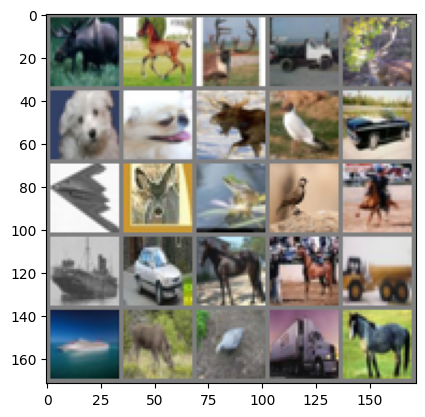

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#Device Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyper Parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# Dataset has PIL Images in range [0,1]
# We transform them into tensors in normalized range [-1,1]

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# CIFAR10: 60000 32X32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

def imshow(imgs):
  imgs = imgs / 2 + 0.5 # unnormalize
  npimgs = imgs.numpy()
  plt.imshow(np.transpose(npimgs,(1,2,0)))
  plt.show()

# One batch of random training images
dataiter = iter(train_loader)
images,labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25],nrow=5)
imshow(img_grid)


In [8]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,32,3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,64,3)
    self.conv3 = nn.Conv2d(64,64,3)
    self.fc1 = nn.Linear(64*4*4,64)
    self.fc2 = nn.Linear(64,10)

  def forward(self,x):
    print(x.shape)
    # N(batch size), 3(color channel), 32, 32 (img size)
    x = F.relu(self.conv1(x)) # N, 32, 30, 30
    print(x.shape)
    x = self.pool(x) # N, 32, 15, 15
    print(x.shape)
    x = F.relu(self.conv2(x)) # N, 64, 13, 13
    print(x.shape)
    x = self.pool(x) # N, 64, 6, 6
    print(x.shape)
    x = F.relu(self.conv3(x)) # N, 64, 4, 4
    print(x.shape)
    x = torch.flatten(x,1) # N, 64*4*4(1024)
    print(x.shape)
    x = F.relu(self.fc1(x)) # N, 64
    print(x.shape)
    x = self.fc2(x) # N, 10
    print(x.shape)
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):

  running_loss = 0.0

  for i,(images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #Forward pass
    outputs = model(images)
    loss = criterion(outputs,labels)

    #Backward and optimize
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_loss += loss.item()

  print(f"[{epoch+1}] loss : {running_loss/n_total_steps:.3f}")

print("training finished")
PATH = './cnn.pth'
torch.save(model.state_dict(),PATH)

Streaming output truncated to the last 5000 lines.
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([3

In [9]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) #It takes loaded dictionary not path file
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
  n_correct=0
  n_correct2 = 0
  n_samples=len(test_loader.dataset)

  for images,labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    outputs=model(images)

    # max rerturn (value,index)
    _,predicted=torch.max(outputs,1)
    n_correct+=(predicted==labels).sum().item()

    outputs2 = loaded_model(images)
    _,predicted2=torch.max(outputs2,1)
    n_correct2+=(predicted2==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f"Accuracy of Model : {acc} %")

  acc = 100.0 * n_correct2 / n_samples
  print(f"Accuracy of Loaded Model : {acc} %")


<ipython-input-9-a7c9e0e59240>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(PATH)) #It takes loaded dictionary not path file


Streaming output truncated to the last 5000 lines.
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([32, 1024])
torch.Size([32, 64])
torch.Size([32, 10])
torch.Size([32, 3, 32, 32])
torch.Size([32, 32, 30, 30])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 13, 13])
torch.Size([32, 64, 6, 6])
torch.Size([32, 64, 4, 4])
torch.Size([3